In [35]:
!pip install gymnasium
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [36]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from time import sleep

In [37]:
# Create env
env = gym.make('FrozenLake-v1', render_mode='human', is_slippery=False)

In [38]:
# Initialize Q-table with zeros
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))

In [39]:
alpha = 0.8    # Learning rate
gamma = 0.95   # Discount factor
epsilon = 0.5  # Exploration rate
episodes = 2000

In [34]:
# storing rewards and steps
rewards_per_episode = []
steps_per_episode = []

In [40]:
def plot_training_progress(rewards, steps, window_size=100):

    # plot
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    # rolling mean of rewards
    rolling_mean_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    ax1.plot(rolling_mean_rewards)
    ax1.set_title(f'Rolling Mean of Rewards (window={window_size})')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Reward')

    # rolling mean of steps
    rolling_mean_steps = np.convolve(steps, np.ones(window_size)/window_size, mode='valid')
    ax2.plot(rolling_mean_steps)
    ax2.set_title(f'Rolling Mean of Steps per Episode (window={window_size})')
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Steps')

    plt.tight_layout()
    plt.show()

In [41]:
def plot_q_table(Q):
    # plot Q table (heatmap)
    plt.figure(figsize=(10, 8))
    sns.heatmap(Q, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Q-table Heatmap')
    plt.xlabel('Actions (0: Left, 1: Down, 2: Right, 3: Up)')
    plt.ylabel('States (0-15)')
    plt.show()


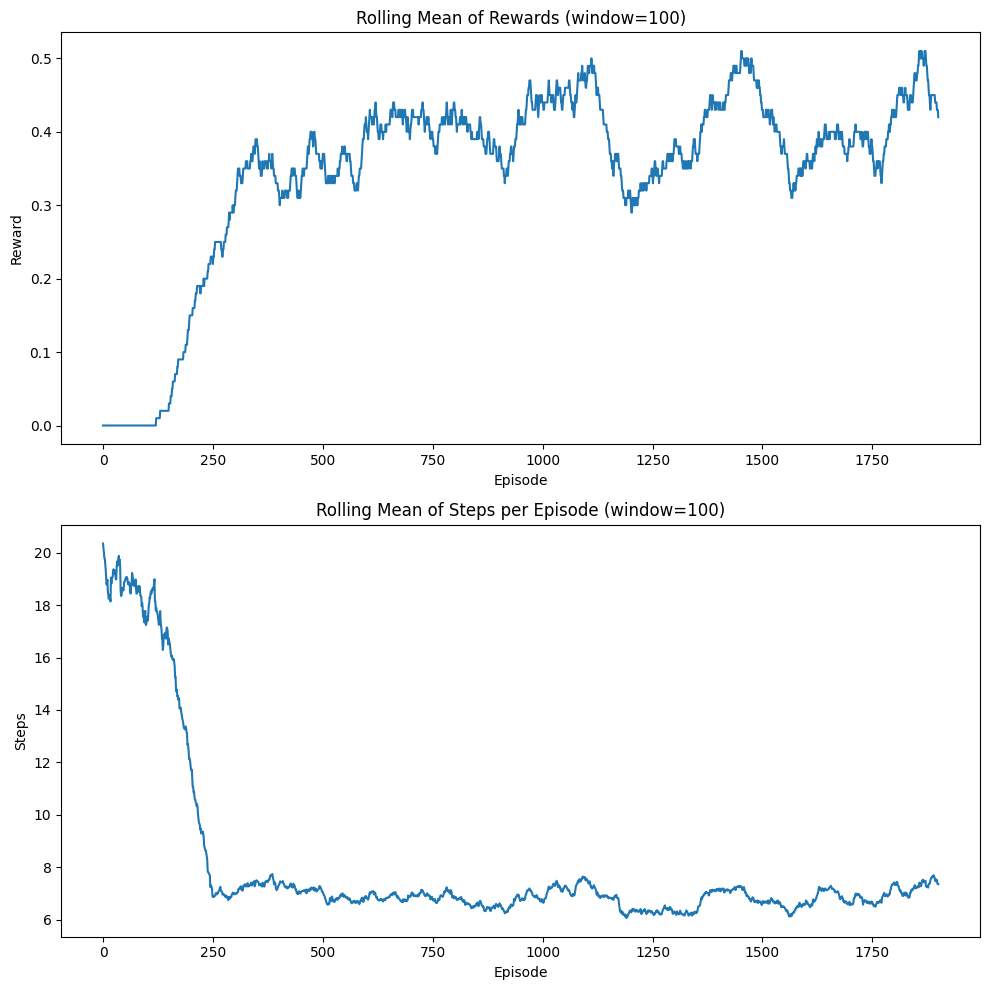

Episode: 2000
Mean Reward (last 100 episodes): 0.42
Mean Steps (last 100 episodes): 7.35
--------------------------------------------------


In [30]:
# training
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    truncated = False
    total_reward = 0
    steps = 0

    while not (done or truncated):
        # Epsilon-greedy selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = int(np.argmax(Q[int(state), :]))

        # Take action, observe outcome
        next_state, reward, done, truncated, _ = env.step(action)

        # Update Q-table
        Q[int(state), action] = Q[int(state), action] + alpha * (
            reward + gamma * np.max(Q[int(next_state), :]) - Q[int(state), action]
        )

        state = next_state
        total_reward += reward
        steps += 1

    rewards_per_episode.append(total_reward)
    steps_per_episode.append(steps)

    # plot progress 100 episodes
    if (episode + 1) % 100 == 0:
        plot_training_progress(rewards_per_episode, steps_per_episode)
        print(f'Episode: {episode + 1}')
        print(f'Mean Reward (last 100 episodes): {np.mean(rewards_per_episode[-100:])}')
        print(f'Mean Steps (last 100 episodes): {np.mean(steps_per_episode[-100:])}')
        print('-' * 50)

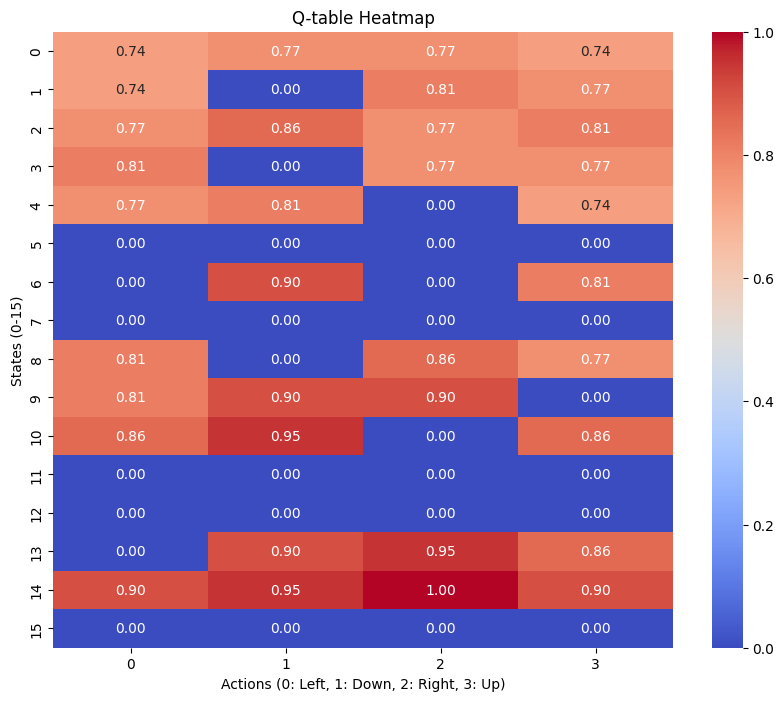

In [31]:
# Final Q-table
plot_q_table(Q)

In [32]:
# Test
def test_agent(env, Q, episodes=50):
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        truncated = False
        total_reward = 0

        print(f'\nEpisode {episode + 1}')

        while not (done or truncated):
            action = int(np.argmax(Q[int(state), :]))
            state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            env.render()
            sleep(0.5)
        print(f'Total Reward: {total_reward}')

In [33]:
print("Testing the trained agent:")
test_agent(env, Q)
env.close()

Testing the trained agent:

Episode 1
Total Reward: 1.0

Episode 2
Total Reward: 1.0

Episode 3
Total Reward: 1.0

Episode 4
Total Reward: 1.0

Episode 5
Total Reward: 1.0

Episode 6
Total Reward: 1.0

Episode 7
Total Reward: 1.0

Episode 8
Total Reward: 1.0

Episode 9
Total Reward: 1.0

Episode 10
Total Reward: 1.0

Episode 11
Total Reward: 1.0

Episode 12
Total Reward: 1.0

Episode 13
Total Reward: 1.0

Episode 14
Total Reward: 1.0

Episode 15
Total Reward: 1.0

Episode 16
Total Reward: 1.0

Episode 17
Total Reward: 1.0

Episode 18
Total Reward: 1.0

Episode 19
Total Reward: 1.0

Episode 20
Total Reward: 1.0

Episode 21
Total Reward: 1.0

Episode 22
Total Reward: 1.0

Episode 23
Total Reward: 1.0

Episode 24
Total Reward: 1.0

Episode 25
Total Reward: 1.0

Episode 26
Total Reward: 1.0

Episode 27
Total Reward: 1.0

Episode 28
Total Reward: 1.0

Episode 29
Total Reward: 1.0

Episode 30
Total Reward: 1.0

Episode 31
Total Reward: 1.0

Episode 32
Total Reward: 1.0

Episode 33
Total Rewa